In [56]:
using SpecialFunctions
using Plots
using LaTeXStrings
using LinearAlgebra
using Printf
include("Vollraum.jl")
default(framestyle=:box, widen=false)
# meshgrid(x, y) = (repeat(x, outer=length(y)), repeat(y, inner=length(x)))

In [57]:
function generate_data_slice(y, z, t, sigma)
    E = [Et([0, yy, zz], [0, 0, 1], t, sigma)[1]
            for zz in z, yy in y]
    return E
end

generate_data_slice (generic function with 1 method)

In [58]:
function circleshape(x, y, r)
    theta = range(0, stop=2*pi, length=500)
    x .+ r .* sin.(theta), y .+ r .* cos.(theta)
end

circleshape (generic function with 1 method)

In [59]:
function plot_data_slice(E, y, z, R)
    contour(y, z, E, fill=true, opacity=0.5, 
    c=cgrad(:RdBu_9, rev=true),
    aspect_ratio=:equal, yaxis=:flip)
    plot!(circleshape(0, 0, R), seriestype=:shape, 
        fillalpha=0.2, 
        linewidth=0, color="black", label=L"\Theta r < 1")
    title!(L"e_x(t)")
    xlabel!("y in m")
    ylabel!("z in m")
end

plot_data_slice (generic function with 1 method)

In [60]:
function theta(t, sigma)
    sqrt(pi * 4e-7 * sigma / 4 / t)
end

theta (generic function with 1 method)

In [61]:
m = [0, 0, 1]
sigma = 0.01
t = 1e-3;

In [30]:
y = range(-1500, stop=1500, length=150)
z = range(-1000, stop=1000, length=100);

$\Theta r = 1 \to r = 1 / \Theta$

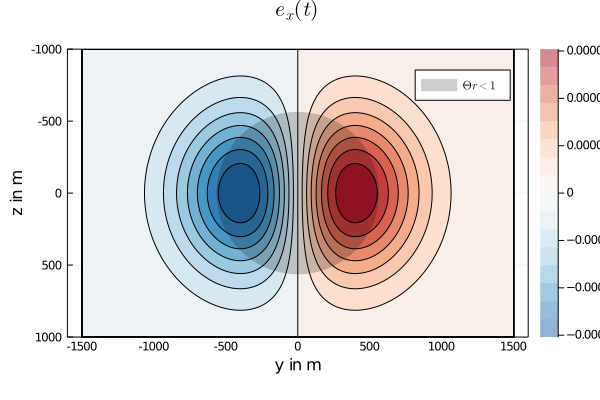

In [62]:
E = generate_data_slice(y, z, t, sigma)
R = 1.0 / theta(t, sigma)
plot_data_slice(E, y, z, R)

In [63]:
R

564.1895835477563

In [39]:
minimum(E)

-1.5194756399703576e-10

┌ Info: Saved animation to 
│   fn = /Users/rub/Dropbox/Vorlesungen/ThEM/Julia/tmp.gif
└ @ Plots /Users/rub/.julia/packages/Plots/sbXPh/src/animation.jl:104


Plots.AnimatedGif("/Users/rub/Dropbox/Vorlesungen/ThEM/Julia/tmp.gif")
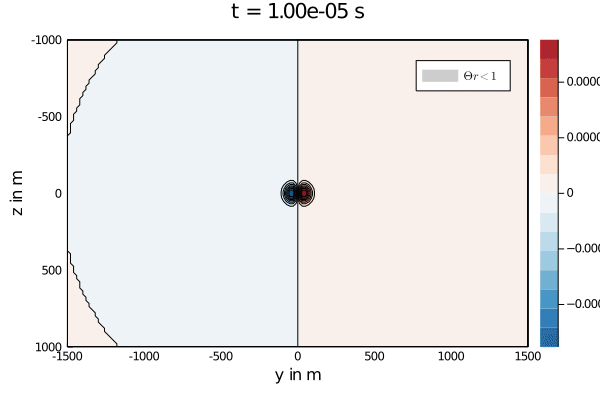

In [64]:
tt = exp10.(range(-5.0, stop = 0.0, length = 51));
anim = @animate for t in tt
    E = generate_data_slice(y, z, t, sigma)
    R = 1.0 / theta(t, sigma)
    cm = maximum(E)
    contour(y, z, E, fill=true, opacity=1, 
        clims=(-cm, cm),
    c=cgrad(:RdBu_9, rev=true),
    aspect_ratio=:equal, yaxis=:flip)
    plot!(circleshape(0, 0, R), seriestype=:shape, 
        fillalpha=0.2, 
        linewidth=0, color="black", label=L"\Theta r < 1")
    title!(@sprintf("t = %.2e s", t))
    xlabel!("y in m")
    ylabel!("z in m")
    xlims!((y[1], y[end]))
    ylims!((z[1], z[end]))
end
gif(anim, "tmp.gif", fps = 2)